# GLOBAL AI JOB MARKET & SALARY TRENDS 2025

# DATA EXPLORATION

## 1. Prepare Data

### Import Liraries for Exploration

In [1]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# plotting map
# import pycountry

In [2]:
# !pip install pycountry

### Import Data

Use a function --"def wrangle()", function will be used also cleaning the data, and also prepare data for model development 

In [34]:
def wrangle(path):
    # read csv file 
    df = pd.read_csv(path)
    
    # work on data index - set to range and rename column
    df.set_index(np.arange(1,15001), inplace=True) # set index to range
    df.index.name = "id"
    
    # drop colums - that are not considered important
    df.drop(columns=["job_id", "salary_currency", "employee_residence", "company_name"], inplace=True)

    # multicolinearity 
    df.drop(columns=["years_experience", "job_description_length",	"benefits_score"], inplace=True)

    # High Cardinality 
    df.drop(columns=["required_skills", "posting_date", "application_deadline"], inplace=True)

    # call the remove_outliers function
    # df = remove_outliers()

    # Calculate the Q1 at 25% and Q3 at 75%
    Q1 = df["salary_usd"].quantile(0.25)
    Q3 = df["salary_usd"].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1
    # IQR
    
    # Calculate the bounds 
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers
    df = df[(df['salary_usd'] >= lower_limit) & (df['salary_usd'] <= upper_limit)]

    return df

In [36]:
# call function
path = "ai_job_dataset.csv"
df = wrangle(path)
# df.head()

In [38]:
df.shape

(14517, 9)

### ii. Explore

In [12]:
# df.isnull().sum() # data is clean
df.columns

Index(['job_title', 'salary_usd', 'experience_level', 'employment_type',
       'company_location', 'company_size', 'employee_residence',
       'remote_ratio', 'required_skills', 'education_required',
       'years_experience', 'industry', 'posting_date', 'application_deadline',
       'job_description_length', 'benefits_score', 'company_name'],
      dtype='object')

In [13]:
df.index

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       14991, 14992, 14993, 14994, 14995, 14996, 14997, 14998, 14999, 15000],
      dtype='int32', name='id', length=15000)

In [14]:
## WoRK ON THE INDEX
# df.set_index(np.arange(1,15001), inplace=True) # set index to range
# df.index.name = "id"
# move to function

In [56]:
print(f"No of Job titles = {df['job_title'].nunique()}")
print(f"No of Experience level = {df['experience_level'].nunique()}")
print(f"No of Employment type = {df['employment_type'].nunique()}")
print(f"No of company location = {df['company_location'].nunique()}")
print(f"No of employee residence = {df['employee_residence'].nunique()}")
print(f"No of experience level = {df['experience_level'].nunique()}")
# df['job_title'].value_counts()

No of Job titles = 20
No of Experience level = 4
No of Employment type = 4
No of company location = 20
No of employee residence = 20
No of experience level = 4


In [64]:
df['job_title'].value_counts()

# Remote_ratio
# df['remote_ratio'].value_counts().plot(kind='barh', title='Remote Ratio', legend=True)


job_title
Machine Learning Researcher    777
Autonomous Systems Engineer    764
AI Software Engineer           763
AI Architect                   740
Robotics Engineer              740
Machine Learning Engineer      739
NLP Engineer                   739
Head of AI                     739
Data Analyst                   738
Data Engineer                  734
AI Research Scientist          723
AI Product Manager             718
Research Scientist             717
Principal Data Scientist       708
Computer Vision Engineer       702
ML Ops Engineer                701
Data Scientist                 700
Deep Learning Engineer         694
AI Specialist                  694
AI Consultant                  687
Name: count, dtype: int64

- Check for Outliers on Salary_usd Column 

In [17]:
# sns.boxplot?

<Axes: ylabel='salary_usd'>

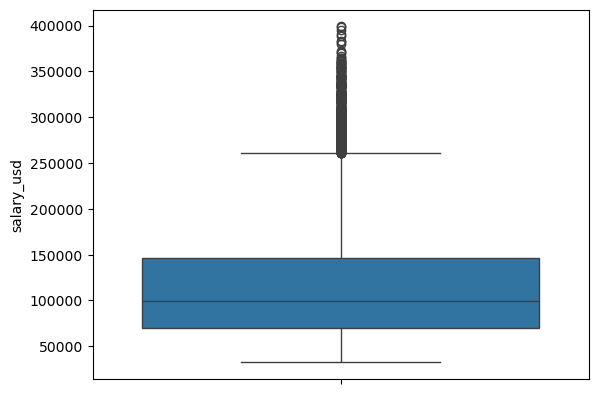

In [18]:
# Check for outliers 
# sns.histplot(df['salary_usd'])
sns.boxplot(df['salary_usd'], vert=True)

In [157]:
# Remove outliers from df using the Tukey's rule (Interquartile Range Rule)

def remove_outliers():
    # Calculate the Q1 at 25% and Q3 at 75%
    Q1 = df["salary_usd"].quantile(0.25)
    Q3 = df["salary_usd"].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1
    # IQR
    
    # Calculate the bounds 
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers
    df_filtered = df[(df['salary_usd'] >= lower_limit) & (df['salary_usd'] <= upper_limit)]

    return df_filtered

# def remove_outliers()
# Call Function in wrangle function

In [38]:
df.shape

(14517, 17)

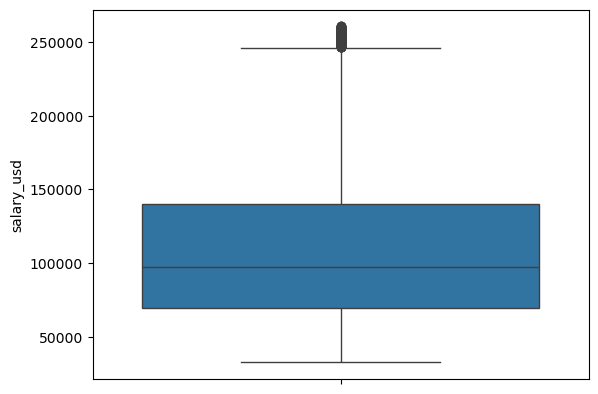

In [40]:
# Check for outliers 
sns.boxplot(df['salary_usd'])
plt.show()

- Graphical Analysis and representation of Salary 

C:\Users\user\AppData\Local\Temp\ipykernel_4112\1852592410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_country.values, y=avg_salary_country.index, palette="viridis")


Text(0, 0.5, 'Country')

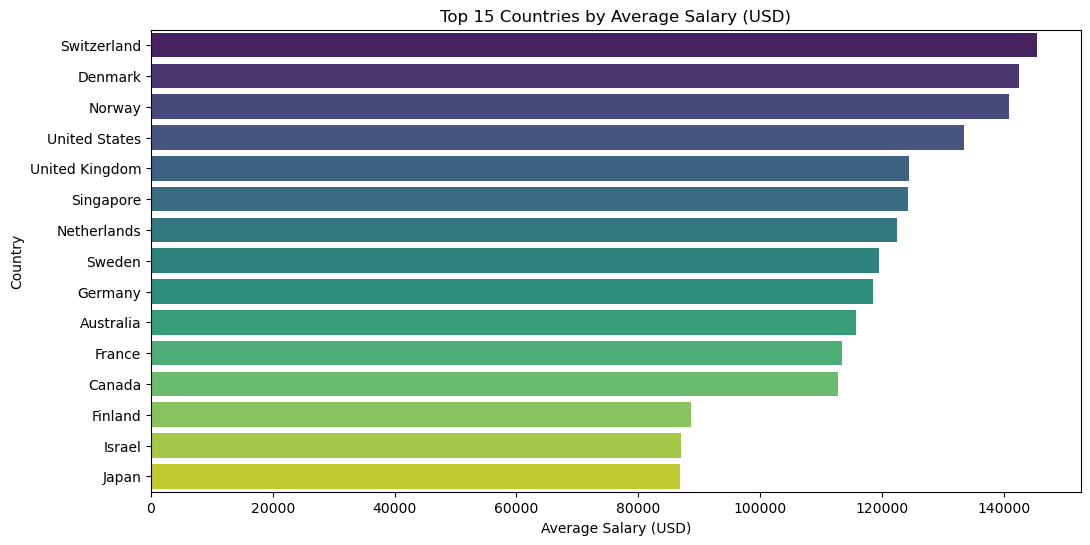

In [44]:
avg_salary_country = df.groupby('company_location')['salary_usd'].mean().sort_values(ascending=False).head(15)
# avg_salary_country
plt.figure(figsize=(12,6))
sns.barplot(x=avg_salary_country.values, y=avg_salary_country.index, palette="viridis")
plt.title("Top 15 Countries by Average Salary (USD)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Country")

C:\Users\user\AppData\Local\Temp\ipykernel_4112\2306795219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_job.values, y=avg_salary_job.index, palette="magma")


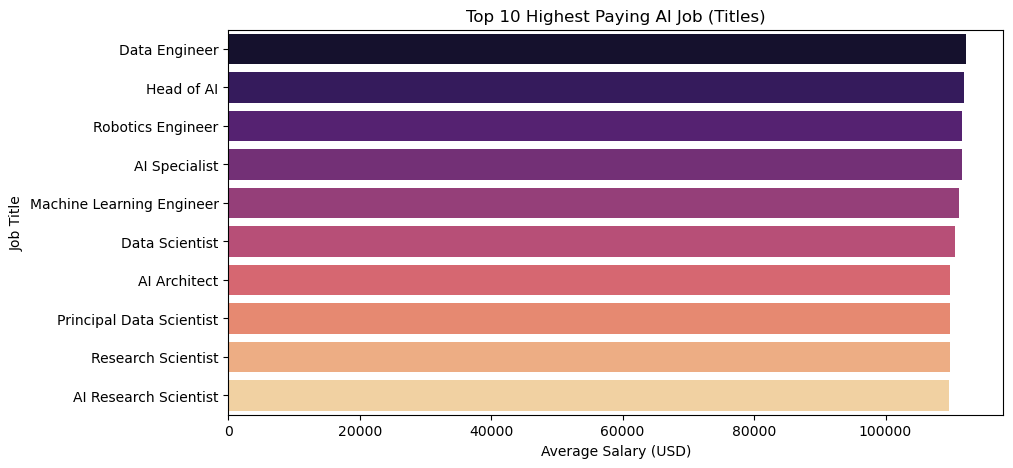

In [47]:
avg_salary_job = df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_salary_job.values, y=avg_salary_job.index, palette="magma")
plt.title("Top 10 Highest Paying AI Job (Titles)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.savefig("aiJobpaying.jpg")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4112\101237906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_experience.values, y=avg_salary_experience.index, palette="magma")


Text(0, 0.5, 'Experience Level')

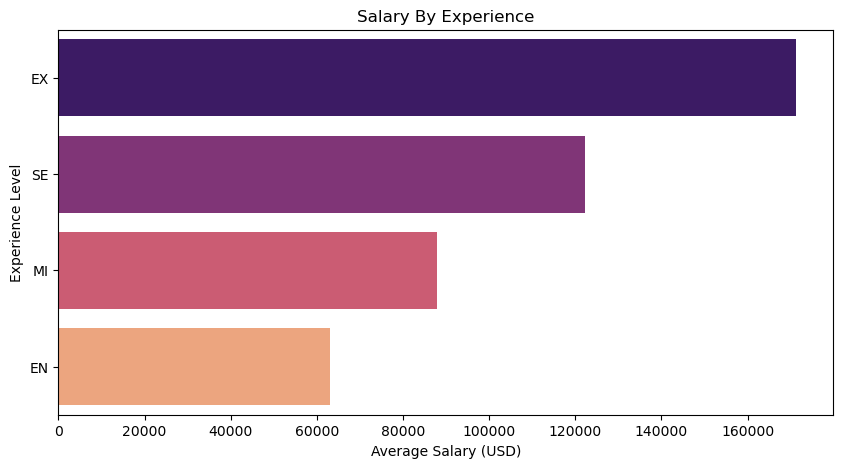

In [49]:
avg_salary_experience = df.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_salary_experience.values, y=avg_salary_experience.index, palette="magma")
plt.title("Salary By Experience")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Experience Level")

In [ ]:
# df_map = df.groupby?

- Display region and salary 

In [1]:
# Step 1: Copy Data
df_ = df.copy()

# # Optional: Filter out extremely low or high salaries for cleaner visuals
# df_clean = df_clean[(df_clean['salary_usd'] > 1000) & (df_clean['salary_usd'] < 500000)]

# Step 2: Group/aggregate by location
map_df = df_.groupby(['company_location', 'job_title'], as_index=False).agg({
    'salary_usd': 'mean',
    'remote_ratio': 'mean',
    'company_size': 'first'
})

# Step 3: Map country to ISO country codes 
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

map_df['iso_alpha'] = map_df['company_location'].apply(get_country_code)

# Step 4: Create the choropleth bubble map
fig = px.scatter_geo(
    map_df,
    locations="iso_alpha",
    color="salary_usd",
    hover_name="company_location",
    size="salary_usd",
    projection="natural earth",
    hover_data={
        'job_title': True,
        'salary_usd': ':.0f',
        'remote_ratio': ':.0f',
        'company_size': True,
        'iso_alpha': False
    },
    title="🌍 Average Salary by Company Location and Job Title"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

NameError: name 'df' is not defined

# MODEL BUILDING

### libraries for machine learning

In [7]:
# model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [8]:
df.head(2)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,remote_ratio,education_required,industry,company_name
id,,,,,,,,,,
1,AI Research Scientist,90376,SE,CT,China,M,50,Bachelor,Automotive,Smart Analytics
2,AI Software Engineer,61895,EN,CT,Canada,M,100,Master,Media,TechCorp Inc


## Factors to consider and explanation

#### 🔁 **Multicollinearity**
> When **two or more independent variables are highly correlated** with each other, making it hard for a linear model to estimate their individual effects accurately.

**Why it matters:** It can distort the coefficient values in **Linear Regression**, making the model unstable and less interpretable.

#### 🗑️ **Unuseful Columns**

> Features that do **not contribute meaningfully** to prediction or might even hurt the model.

* `job_id` → Just an identifier, no predictive power
* `posting_date` and `application_deadline` → Unless time series 
* `salary_currency` → Redundant, `salary_usd` highly useful.

---

### 🔢 **Cardinality**

> **Cardinality** refers to the **number of unique values** in a categorical column.

* **Low cardinality**: Few unique values
  *Example*: `experience_level` → EN, MI, SE, EX
* **High cardinality**: Many unique values
  *Example*: `job_title`, `employee_residence`, `required_skills`
---
High cardinality can:
* **Blow up your feature space** when one-hot encoding
* **Increase the risk of overfitting**
* **Slow down training and inference**

#### ⚠️ **Overfitting**

> When your model **learns the training data too well**, including noise and minor patterns, and performs **poorly on new (unseen) data**.

**Symptoms:**

* High training accuracy, but low test accuracy

**In project:** Too many dummy variables (e.g., one-hot for job titles) can cause this. One-hot is useful for linear regression

---

#### 😐 **Underfitting**

> When your model is **too simple** to capture the underlying patterns in the data.

**Symptoms:**

* Poor performance on both training and test sets

**In project:** Ignoring important variables or using a model too basic without tuning can lead to this.

---

#### 🛠️ **Hyperparameters** - Not relevant here

> **Settings you configure before training** a model — they control how the algorithm learns.

**Examples (in other models):**

* `alpha` in Ridge or Lasso (regularization strength)
* `learning_rate`, `n_estimators` in tree-based models

**Note:** Linear Regression has **few or no hyperparameters**, but if you move to Ridge/Lasso, tuning `alpha` will matter.

---

#### Revert back to wrangle function

<Axes: >

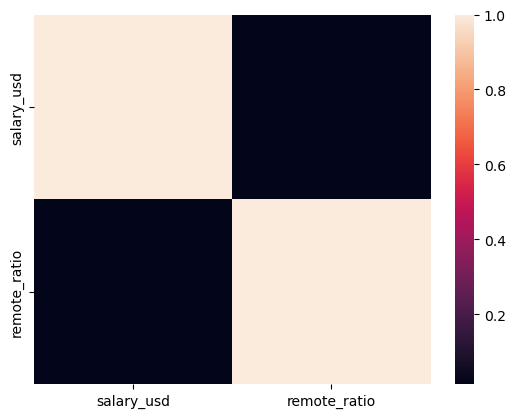

In [11]:
# Multicollinearity --- check for values that are correlated with the target vector
correlation = df.select_dtypes('number').corr()
# correlation
sns.heatmap(correlation)

In [12]:
# years_experience is highly correlated (+ve correlation)
# remote_ratio --- lowly correlated

In [40]:
# Cardinality - Unique Data points
# count number of unique values in each columns in the consider featured matrix
unique_counts = df.select_dtypes('object').nunique()
print(unique_counts)

job_title             20
experience_level       4
employment_type        4
company_location      20
company_size           3
education_required     4
industry              15
dtype: int64


In [42]:
# Validate Cardinality
low_cardinality = []
moderate_cardinality = []
high_cardinality = []

for column in df.select_dtypes('object'):
    num_unique = df[column].nunique()
    if num_unique < 10:
        low_cardinality.append((column, num_unique))
    elif num_unique < 50:
        moderate_cardinality.append((column, num_unique))
    else:
        high_cardinality.append((column, num_unique))

print("Low Cardinality:", low_cardinality)
print("Moderate Cardinality:", moderate_cardinality)
print("High Cardinality:", high_cardinality)

Low Cardinality: [('experience_level', 4), ('employment_type', 4), ('company_size', 3), ('education_required', 4)]
Moderate Cardinality: [('job_title', 20), ('company_location', 20), ('industry', 15)]
High Cardinality: []


In [15]:
# Could "employee_residence" be featured?  
# What about companyname

In [44]:
df.head(2)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,remote_ratio,education_required,industry
id,,,,,,,,,
1,AI Research Scientist,90376,SE,CT,China,M,50,Bachelor,Automotive
2,AI Software Engineer,61895,EN,CT,Canada,M,100,Master,Media


### iii. Split

In [47]:
X = df.drop(columns="salary_usd")
y = df["salary_usd"]

In [49]:
# df.nunique()
X.head()

,job_title,experience_level,employment_type,company_location,company_size,remote_ratio,education_required,industry
id,,,,,,,,
1,AI Research Scientist,SE,CT,China,M,50,Bachelor,Automotive
2,AI Software Engineer,EN,CT,Canada,M,100,Master,Media
3,AI Specialist,MI,FL,Switzerland,L,0,Associate,Education
4,NLP Engineer,SE,FL,India,M,50,PhD,Consulting
5,AI Consultant,EN,PT,France,S,100,Master,Media


In [118]:
# X.select_dtypes('number').value_counts()
X.industry.value_counts().sort_index()  # sort_alphabetically

industry
Automotive             983
Consulting             978
Education              922
Energy                 946
Finance                952
Gaming                 943
Government             965
Healthcare             973
Manufacturing          938
Media                 1009
Real Estate            967
Retail                1024
Technology             975
Telecommunications     979
Transportation         963
Name: count, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Baseline - 

In [54]:
# Baseline
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Baseline MAE:", baseline)

Mean apt price: 109359.12064066133
Baseline MAE: 41135.83922519955


Interpretation: If we guessed every salary to be the average of all training salaries, our error would be ~$41k.

#### Build Model
- Build pipeline
- Feature engineering: OneHotEncoding

In [82]:
X_train.head()

,job_title,experience_level,employment_type,company_location,company_size,remote_ratio,education_required,industry
id,,,,,,,,
8796,Machine Learning Engineer,MI,CT,Canada,L,100,PhD,Government
8077,AI Consultant,MI,PT,United Kingdom,S,100,Associate,Consulting
9712,Autonomous Systems Engineer,EN,FL,France,L,100,PhD,Technology
9961,Head of AI,MI,FL,Austria,S,50,Associate,Healthcare
12119,Autonomous Systems Engineer,MI,PT,Singapore,L,0,PhD,Consulting


In [60]:
# ohe = OneHotEncoder(sparse_output=True)
# # fit
# ohe.fit(X_train)
# # Transform 
# XT_train = ohe.transform(X_train)
# # print(XT_train.shape)
# XT_train

In [62]:
model = make_pipeline(
    OneHotEncoder(sparse_output=False), # feature engineering
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(sparse_output=False)),
                ('linearregression', LinearRegression())])

In [63]:
# model.predict(X_test)

#### Check MAE against the baseline

In [67]:
y_pred_training = model.predict(X_train)

mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 14199.1


In [69]:
# Error Reduction (%) = ((Baseline MAE - Model MAE) / Baseline MAE) * 100
error_reduction = (baseline - mae_training) / baseline * 100
print(f"Error reduced by, {np.round(error_reduction, 2)}%")
# (mae_training/baseline) * 100

Error reduced by, 65.48%


Interpretation: **Model reduced the error by almost 65% compared to the baseline, which is a strong indication that the model is capturing useful patterns.**

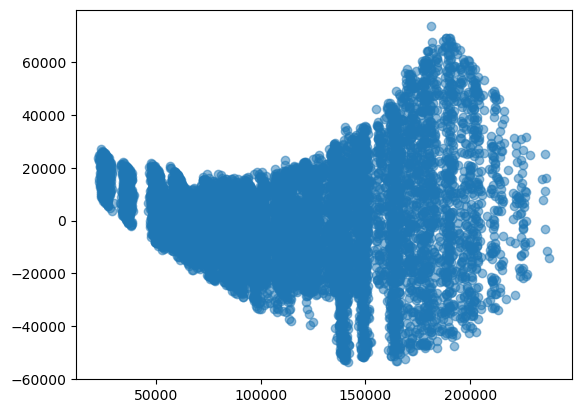

In [72]:
# Residual Analysis: 
residuals = y_train - y_pred_training
# plt.hist(residuals, bins=10)
plt.scatter(y_pred_training, residuals, alpha=0.5)
# plt.title("Training Residuals")
# plt.xlabel("Error")
# plt.ylabel("Frequency")

#### Coefficient Summary

> Tells us how much each feature contributes to the salary prediction (↑ or ↓), holding all others constant.

In [75]:
feature_names = model.named_steps['onehotencoder'].get_feature_names_out(X_train.columns)
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.named_steps['linearregression'].coef_
}).sort_values(by='Coefficient', ascending=False)
coeff_df.head(10)

,Feature,Coefficient
21,experience_level_EX,64134.828639
45,company_location_Switzerland,46076.419011
32,company_location_Denmark,35993.288151
41,company_location_Norway,34991.189955
47,company_location_United States,25691.556897
46,company_location_United Kingdom,14816.741859
42,company_location_Singapore,13893.745805
48,company_size_L,12856.008541
40,company_location_Netherlands,12650.354934
23,experience_level_SE,9736.674168


C:\Users\user\AppData\Local\Temp\ipykernel_10808\2361155311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(5), palette='viridis')


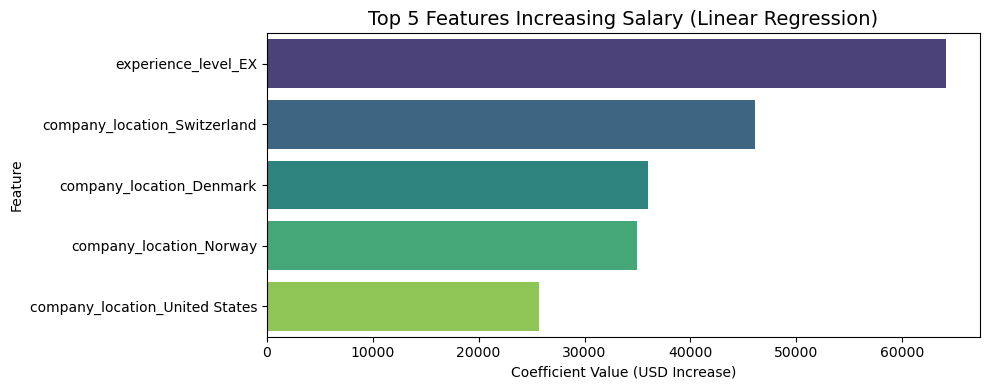

In [77]:
plt.figure(figsize=(10, 4))
# sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(5), hue=coeff_df.Coefficient, palette='viridis')
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(5), palette='viridis')
plt.title('Top 5 Features Increasing Salary (Linear Regression)', fontsize=14)
plt.xlabel('Coefficient Value (USD Increase)')
plt.ylabel('Feature')
plt.tight_layout()

#### Save model to .pkl
- pickle
- joblib

In [80]:
import pickle

# Save model
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(model, file)
